Для вирішення завдань використайте вибірки даних про ціни на
нерухомість у Бостоні або Каліфорнії.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [68]:
cal_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
cal_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [69]:
cal_test = pd.read_csv("/content/sample_data/california_housing_test.csv")
cal_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


1. Для обраного датасету розділіть вибірки на навчальну та перевірочну
частини.


In [70]:
X_train = np.array(cal_train.loc(1)["longitude":"median_income"]).reshape(-1, 8)
X_train

array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.3   ,   41.8   ,   19.    , ..., 1298.    ,  478.    ,
           1.9797],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [71]:
X_test = np.array(cal_test.loc(1)["longitude":"median_income"]).reshape(-1, 8)
X_test

array([[-122.05  ,   37.37  ,   27.    , ..., 1537.    ,  606.    ,
           6.6085],
       [-118.3   ,   34.26  ,   43.    , ...,  809.    ,  277.    ,
           3.599 ],
       [-117.81  ,   33.78  ,   27.    , ..., 1484.    ,  495.    ,
           5.7934],
       ...,
       [-119.7   ,   36.3   ,   10.    , ...,  693.    ,  220.    ,
           2.2895],
       [-117.12  ,   34.1   ,   40.    , ...,   46.    ,   14.    ,
           3.2708],
       [-119.63  ,   34.42  ,   42.    , ...,  753.    ,  260.    ,
           8.5608]])

In [72]:
y_train = np.array(cal_train.loc(1)["median_house_value"]).reshape(-1, 1)
y_train

array([[ 66900.],
       [ 80100.],
       [ 85700.],
       ...,
       [103600.],
       [ 85800.],
       [ 94600.]])

In [73]:
y_test = np.array(cal_test.loc(1)["median_house_value"]).reshape(-1, 1)
y_test

array([[344700.],
       [176500.],
       [270500.],
       ...,
       [ 62000.],
       [162500.],
       [500001.]])

2. Виконайте навчання моделі DecisionTreeRegressor для визначення
цільової змінної (ціни дома).

In [74]:
model_dt = DecisionTreeRegressor()

In [75]:
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [76]:
y_predict_dt = model_dt.predict(X_test)
y_predict_dt

array([411300., 165500., 243500., ...,  67500., 143800., 500001.])

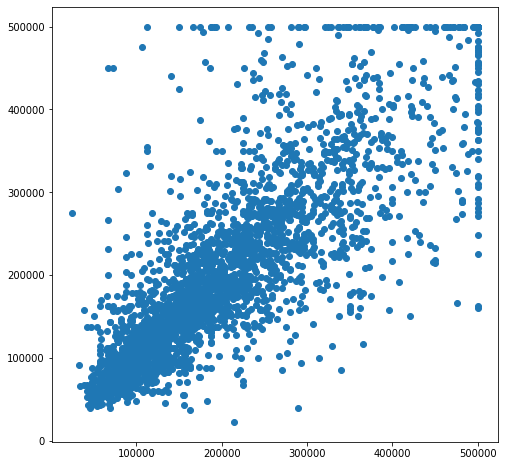

In [77]:
plt.figure(figsize=(8, 8))
plt.scatter(y_predict_dt, y_test)

3. Виконайте нормалізацію даних за допомогою MinMaxScaler та
виконайте навчання моделі KNeighborsRegressor для визначення цільової
змінної. 

In [78]:
pipe_knn = Pipeline([
                     ("scale", MinMaxScaler()),
                     ("model", KNeighborsRegressor())
])

pipe_knn

Pipeline(steps=[('scale', MinMaxScaler()), ('model', KNeighborsRegressor())])

In [79]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()), ('model', KNeighborsRegressor())])

In [80]:
y_predict_knn = pipe_knn.predict(X_test)
y_predict_knn

array([[342820. ],
       [216840. ],
       [241740. ],
       ...,
       [ 65180. ],
       [ 89080. ],
       [487700.8]])

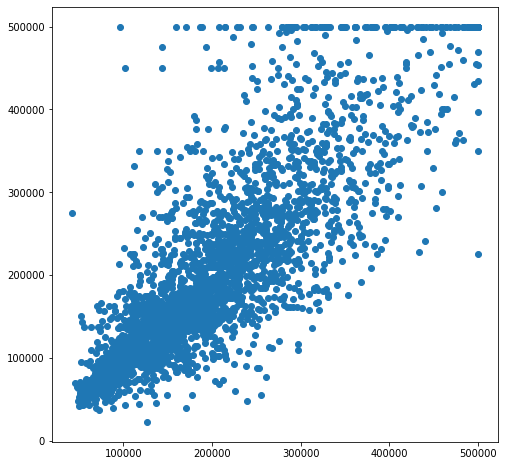

In [81]:
plt.figure(figsize=(8, 8))
plt.scatter(y_predict_knn, y_test)

4. Оцініть якість моделей за допомогою метрики R2.

In [82]:
metrics.r2_score(y_test, y_predict_dt)

0.6497924617450495

In [83]:
metrics.r2_score(y_test, y_predict_knn)

0.6761372688966154